### TAREA 14

__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [136]:
function runge(f,list,x0) #usamos el código del  método de Runge-Kutta independiente de la dimensión.
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
         t = i*h
        k1=f(x,t)  
        k2=f(x+(h/2)*k1,t+(h/2))
        k3=f(x+(h/2)*k2,t+(h/2))
        k4=f(x+h*k3,t+h)
        x=x+(h/6)*(k1+2k2+2k3+k4)
    
        push!(listx,x) 
     end
     return listx
end

runge (generic function with 1 method)

In [135]:
U(x,t)=[x[2]-1*x[2]^3;-1*x[1]-x[2]^2] #sistema de ec diferenciales usando arreglo de matríz 

U (generic function with 1 method)

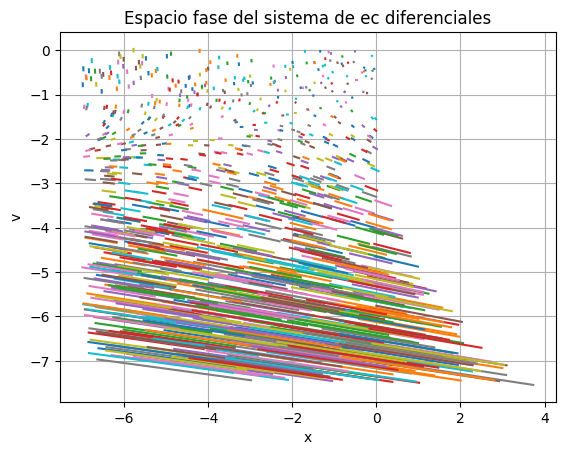

In [155]:
for i in 1:1000
  list=-0.005:0.0001:0.005; 
      w=7*(rand(1,2)-1)
    vector=runge(U,list,[w[1],w[2]]);
    listx15r=map(x->x[1],vector);
listx25r=map(x->x[2],vector);
    plot(listx15r,listx25r)
      legend()
 xlabel("x")
    ylabel("v")
    title("Espacio fase del sistema de ec diferenciales")
    grid("on")
show(); 
end

Calculamos el jacobiano 

 $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$

sacando las parciales y evaluando en cero obtenemos la matriz

\begin{pmatrix}
0 & 1 \\
-1 & 0 \\
\end{pmatrix}


calculamos la traza y el determiante. $$tra(J)=0$$ y $$Det(J)=1$$ si nombramos J a la matríz anterior 

tenemos el punto (1,0) el cual de acuerdo al diagrama de Strogratz el vector cero es un punto fijo no aislado.

__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
* Usen $\mu=0.5$.
* Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

In [140]:
f(x,t)=[x[2], -1.0*x[1]+0.5(1.0-x[1]^2)*x[2]]  #ecuación del oscilador de van der Pol, el valor de mu es 0.5

f (generic function with 1 method)

In [141]:
using PyPlot

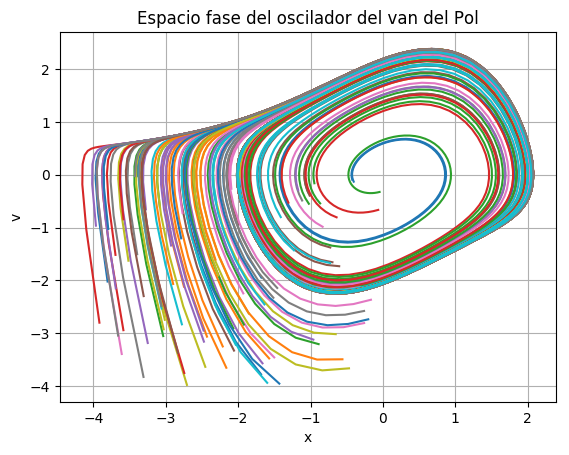

In [142]:
for i in 1:100
  list=-10:0.1:10;   #para dintintas condiciones inciales.
      w=4*(rand(1,2)-1) #rango de vectores aleatorios cuyas entradas están entre -4 y 4
    vector=runge(f,list,[w[1],w[2]]); #sustituyendo en los valores de condiciones iniciales las iteraciones del ciclo for 
    listx15r=map(x->x[1],vector);
listx25r=map(x->x[2],vector);
    plot(listx15r,listx25r)
    legend()
 xlabel("x")
    ylabel("v")
    title("Espacio fase del oscilador del van del Pol")
    grid("on")
show(); 
end

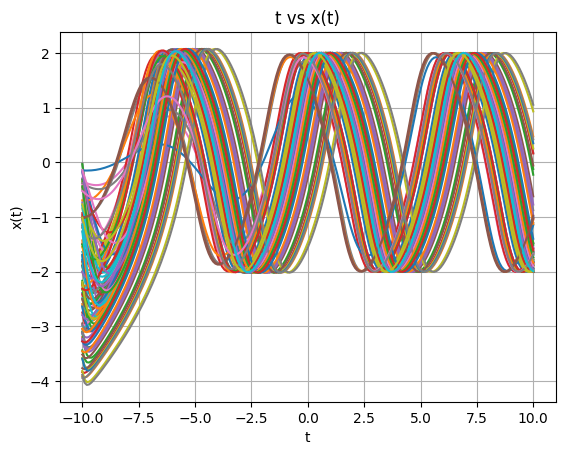

In [143]:
for i in 1:100
  list=-10:0.1:10;   #para dintintas condiciones inciales.
      w=4*(rand(1,2)-1) #rango de vectores aleatorios cuyas entradas están entre -4 y 4
    vector=runge(f,list,[w[1],w[2]]); #sustituyendo en los valores de condiciones iniciales las iteraciones del ciclo for 
    listx15r=map(x->x[1],vector);
listx25r=map(x->x[2],vector);
    plot(list,listx15r)
    legend() 
 xlabel("t")
    ylabel("x(t)")
    title("t vs x(t)")
    grid("on")
show(); 
end

Obvervamos que son funciones trigonométricas 

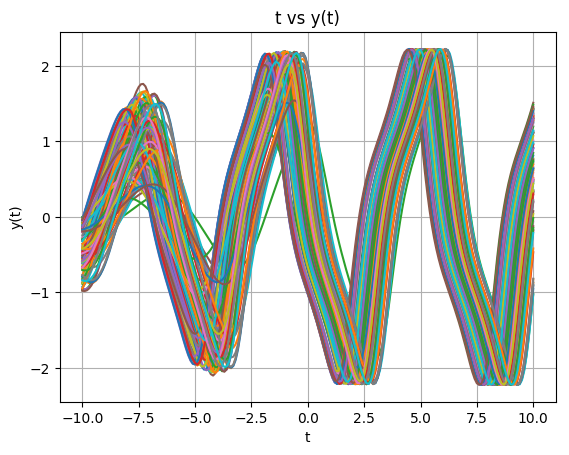

In [144]:
for i in 1:100
  list=-10:0.1:10;   #para dintintas condiciones inciales.
      w=1*(rand(1,2)-1) #rango de vectores aleatorios cuyas entradas están entre -1y 1
    vector=runge(f,list,[w[1],w[2]]); #sustituyendo en los valores de condiciones iniciales las iteraciones del ciclo for 
    listx15r=map(x->x[1],vector);
listx25r=map(x->x[2],vector);
    plot(list,listx25r)
    legend() 
 xlabel("t")
    ylabel("y(t)")
    title("t vs y(t)")
    grid("on")
show(); 
end